# Exploratory Data Analysis (EDA) in Python

## Introduction 

Exploratory Data Analysis of the pima indian diabete dataset

The features present in the dataset are : 


   1. Number of times pregnant  -> pregnancies
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test ->glucose_2h
   3. Diastolic blood pressure (mm Hg) -> blood_pressure
   4. Triceps skin fold thickness (mm) -> skin_thickness
   5. 2-Hour serum insulin (mu U/ml) -> insulin_2h
   6. Body mass index (weight in kg/(height in m)^2) -> bmi
   7. Diabetes pedigree function -> diabetes_pedigree
   8. Age (years) -> age
   9. Class variable (0 or 1) -> outcome

For Each Attribute: (all numeric-valued)


Diễn dịch lại các thuộc tính & biến

    1.

In [4]:
#import all import python libraris
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:

colnames=["pregnancies","glucose_2h","blood_pressure","skin_thickness","insulin_2h","bmi","diabetes_pedigree","age","outcome"]
diabetes_df = pd.read_csv("pima-indians-diabetes.data.csv",names=colnames)
diabetes_df.head()

,pregnancies,glucose_2h,blood_pressure,skin_thickness,insulin_2h,bmi,diabetes_pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        768 non-null    int64  
 1   glucose_2h         768 non-null    int64  
 2   blood_pressure     768 non-null    int64  
 3   skin_thickness     768 non-null    int64  
 4   insulin_2h         768 non-null    int64  
 5   bmi                768 non-null    float64
 6   diabetes_pedigree  768 non-null    float64
 7   age                768 non-null    int64  
 8   outcome            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
counts = diabetes_df["outcome"].value_counts()
percents = diabetes_df["outcome"].value_counts(normalize=True) * 100

outcome_summary = pd.DataFrame({
    "outcome" : counts.index , 
    "instances" : counts.values, 
    "percent": percents.values.round(2)
})
outcome_summary


,outcome,instances,percent
0,0,500,65.1
1,1,268,34.9


In [18]:
diabetes_df.shape

(768, 9)

In [19]:
diabetes_df.isnull().sum()

pregnancies          0
glucose_2h           0
blood_pressure       0
skin_thickness       0
insulin_2h           0
bmi                  0
diabetes_pedigree    0
age                  0
outcome              0
dtype: int64

In [20]:
diabetes_df.describe()

,pregnancies,glucose_2h,blood_pressure,skin_thickness,insulin_2h,bmi,diabetes_pedigree,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
diabetes_df.corr()

,pregnancies,glucose_2h,blood_pressure,skin_thickness,insulin_2h,bmi,diabetes_pedigree,age,outcome
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_2h,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin_2h,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetes_pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [23]:
diabetes_df['pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [24]:
diabetes_df['glucose_2h'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

In [26]:
diabetes_df['blood_pressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [27]:
diabetes_df['skin_thickness'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

In [30]:
diabetes_df['insulin_2h'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [32]:
diabetes_df['bmi'].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [33]:
#diabetes_pedigree
diabetes_df['diabetes_pedigree'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [35]:

diabetes_df['age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [37]:
cols_with_missing=["glucose_2h","blood_pressure","skin_thickness","insulin_2h","bmi"]
diabetes_df[cols_with_missing]=diabetes_df[cols_with_missing].replace(0,np.nan)

In [39]:
diabetes_df['insulin_2h'].unique() #vis du 1 cai ->nan

array([ nan,  94., 168.,  88., 543., 846., 175., 230.,  83.,  96., 235.,
       146., 115., 140., 110., 245.,  54., 192., 207.,  70., 240.,  82.,
        36.,  23., 300., 342., 304., 142., 128.,  38., 100.,  90., 270.,
        71., 125., 176.,  48.,  64., 228.,  76., 220.,  40., 152.,  18.,
       135., 495.,  37.,  51.,  99., 145., 225.,  49.,  50.,  92., 325.,
        63., 284., 119., 204., 155., 485.,  53., 114., 105., 285., 156.,
        78., 130.,  55.,  58., 160., 210., 318.,  44., 190., 280.,  87.,
       271., 129., 120., 478.,  56.,  32., 744., 370.,  45., 194., 680.,
       402., 258., 375., 150.,  67.,  57., 116., 278., 122., 545.,  75.,
        74., 182., 360., 215., 184.,  42., 132., 148., 180., 205.,  85.,
       231.,  29.,  68.,  52., 255., 171.,  73., 108.,  43., 167., 249.,
       293.,  66., 465.,  89., 158.,  84.,  72.,  59.,  81., 196., 415.,
       275., 165., 579., 310.,  61., 474., 170., 277.,  60.,  14.,  95.,
       237., 191., 328., 250., 480., 265., 193.,  7

In [43]:
diabetes_df_clean = diabetes_df.dropna()
diabetes_df_clean['insulin_2h'].unique() # vi du

array([ 94., 168.,  88., 543., 846., 175., 230.,  83.,  96., 235., 146.,
       115., 140., 110., 245.,  54., 192., 207.,  70., 240.,  82.,  36.,
        23., 300., 342., 304., 142., 128.,  38., 100.,  90., 270.,  71.,
       125., 176.,  48.,  64., 228.,  76., 220.,  40., 152.,  18., 135.,
       495.,  37.,  51.,  99., 145., 225.,  49.,  50.,  92., 325.,  63.,
       284., 119., 204., 155., 485.,  53., 114., 105., 285., 156.,  78.,
       130.,  55.,  58., 160., 210., 318.,  44., 190., 280.,  87., 271.,
       129., 120., 478.,  56.,  32., 744., 370.,  45., 194., 680., 402.,
       258., 375., 150.,  67.,  57., 116., 278., 122., 545.,  75.,  74.,
       182., 360., 215., 184.,  42., 132., 148., 180., 205.,  85., 231.,
        29.,  68.,  52., 255., 171.,  73., 108.,  43., 167., 249., 293.,
        66., 465., 158.,  84.,  72.,  59.,  81., 196., 415., 275., 165.,
       579., 310.,  61., 474., 170., 277.,  60.,  14.,  95., 237., 191.,
       328., 250., 480., 265., 193.,  79.,  86., 32

In [44]:
diabetes_df_clean.describe()

,pregnancies,glucose_2h,blood_pressure,skin_thickness,insulin_2h,bmi,diabetes_pedigree,age,outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# diem dang chu y trong du lieu 

- glucose_2h : min=56 ->không còn 0, hợp lý
- blood_pressure : min=24 ->vẫn hợp lý(cực kỳ thấp ->ngoại lai)
- skin_thickness : min=7 -> hợp lý
- insulin_2h : min=14,max = 846 ->insulin có phân phối rất lệch
- bmi : hợp lý

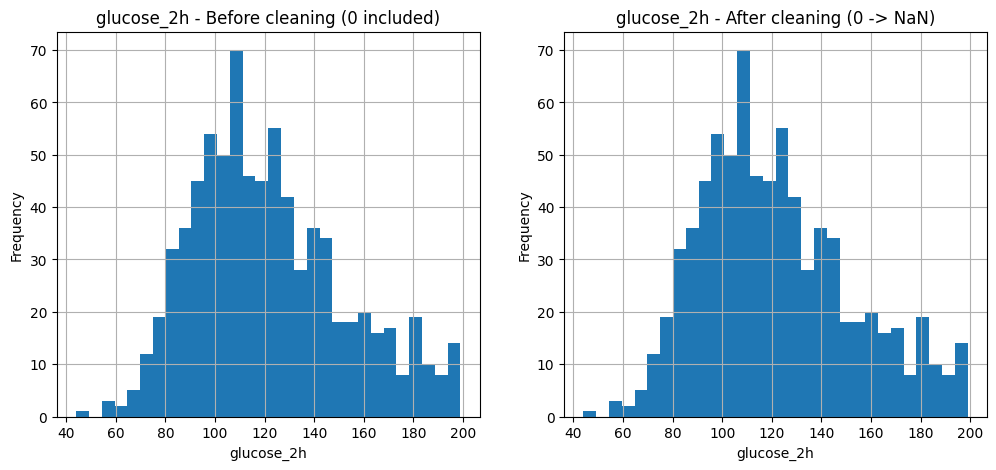

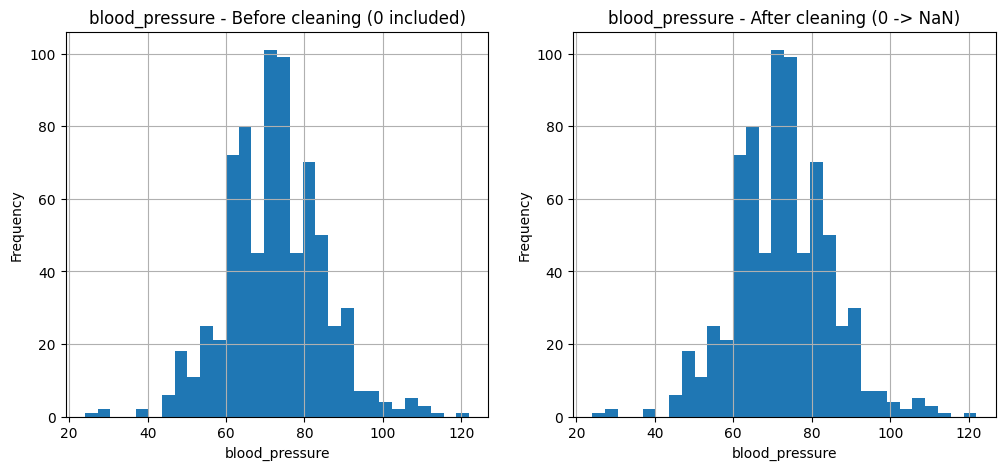

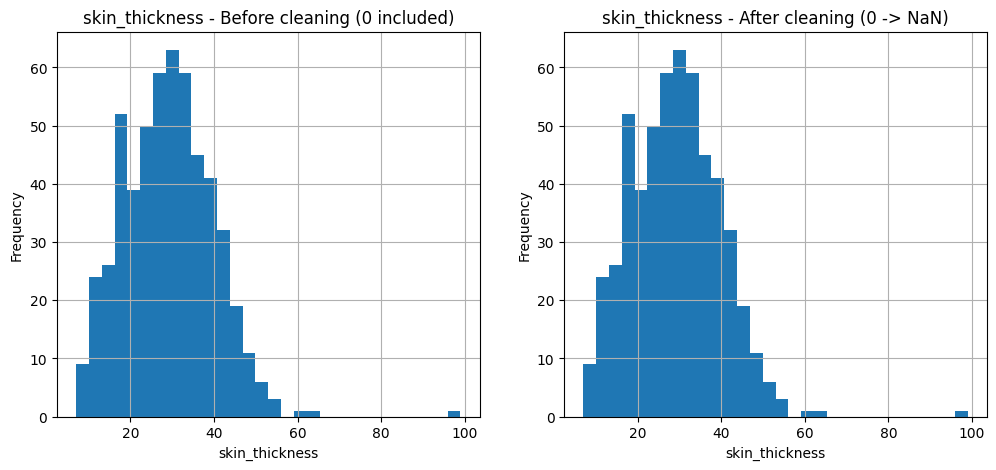

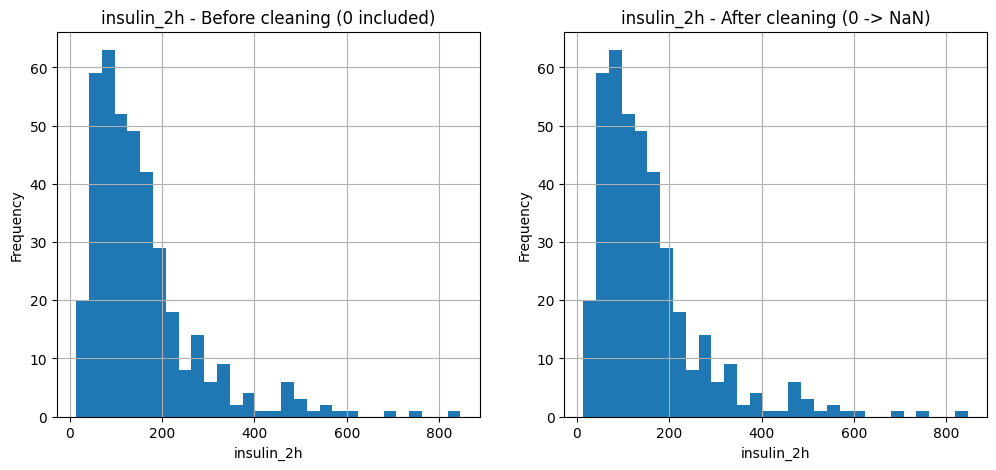

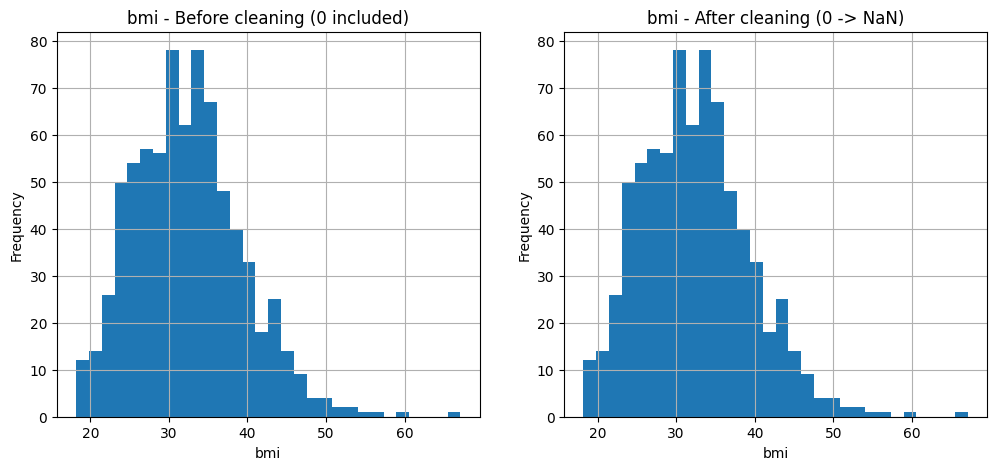

/tmp/ipykernel_4418/703380767.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_raw[col].dropna(), df_clean[col].dropna()],


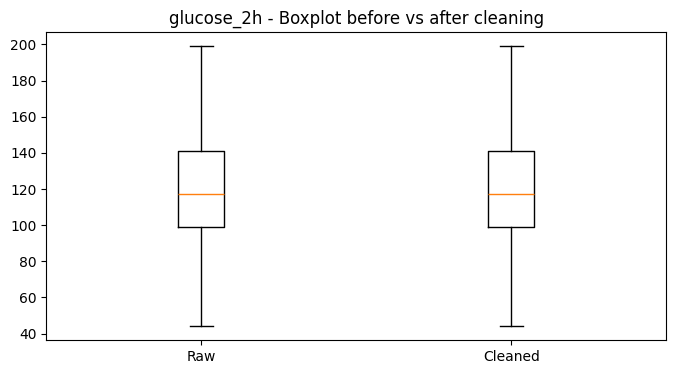

/tmp/ipykernel_4418/703380767.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_raw[col].dropna(), df_clean[col].dropna()],


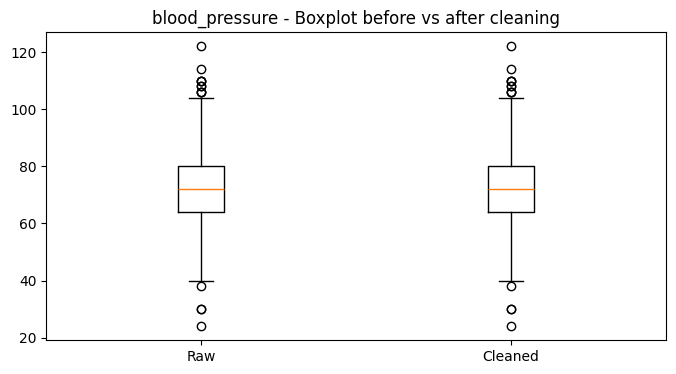

/tmp/ipykernel_4418/703380767.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_raw[col].dropna(), df_clean[col].dropna()],


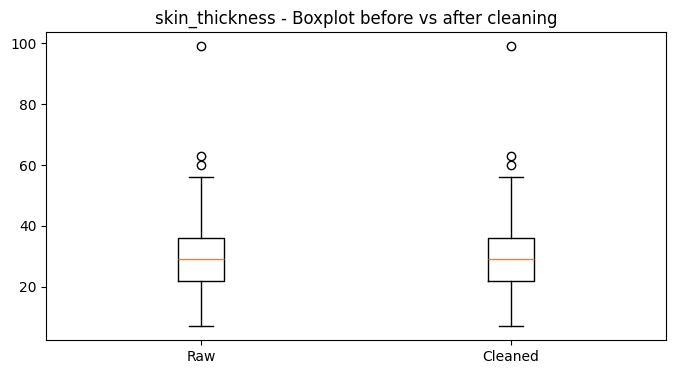

/tmp/ipykernel_4418/703380767.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_raw[col].dropna(), df_clean[col].dropna()],


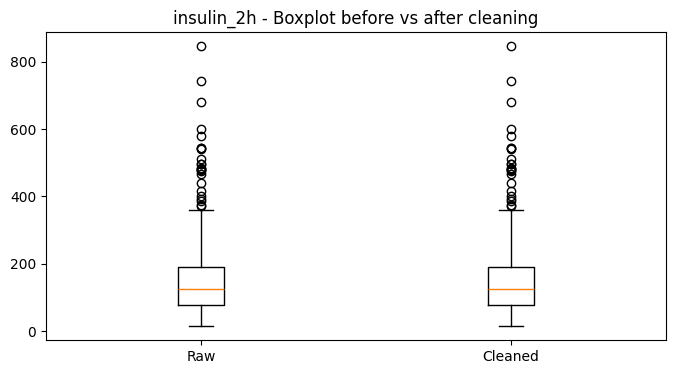

/tmp/ipykernel_4418/703380767.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_raw[col].dropna(), df_clean[col].dropna()],


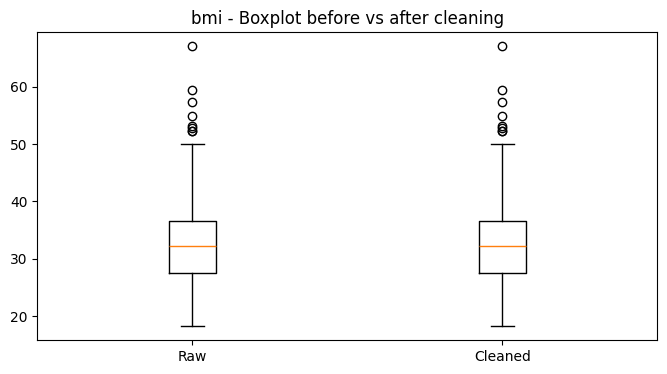

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


cols = ["glucose_2h", "blood_pressure", "skin_thickness", "insulin_2h", "bmi"]


df_raw = diabetes_df.copy()


df_clean = diabetes_df.copy()
df_clean[cols] = df_clean[cols].replace(0, np.nan)

# Vẽ histogram trước và sau xử lý
for col in cols:
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    df_raw[col].hist(bins=30)
    plt.title(f"{col} - Before cleaning (0 included)")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    plt.subplot(1,2,2)
    df_clean[col].hist(bins=30)
    plt.title(f"{col} - After cleaning (0 -> NaN)")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    plt.show()

# Vẽ boxplot để thấy outlier
for col in cols:
    plt.figure(figsize=(8,4))
    plt.boxplot([df_raw[col].dropna(), df_clean[col].dropna()],
                labels=["Raw", "Cleaned"])
    plt.title(f"{col} - Boxplot before vs after cleaning")
    plt.show()


In [48]:
duplicates=diabetes_df_clean.duplicated().sum()
duplicates

np.int64(0)

In [49]:
# Kiểm tra các dòng có cùng features nhưng outcome khác nhau
dupes_partial = diabetes_df_clean.duplicated(subset=diabetes_df_clean.columns[:-1])
dupes_partial.sum()

np.int64(0)

# chu y du lieu gioi han nữa 
+ Xác định tính chất
+ Phân tích đơn biến
+ Phân tích đa biến
+ Xác định giá trị thiếu, và mẫu bất thường
+ Xác định ngoại lệ

# EDA 

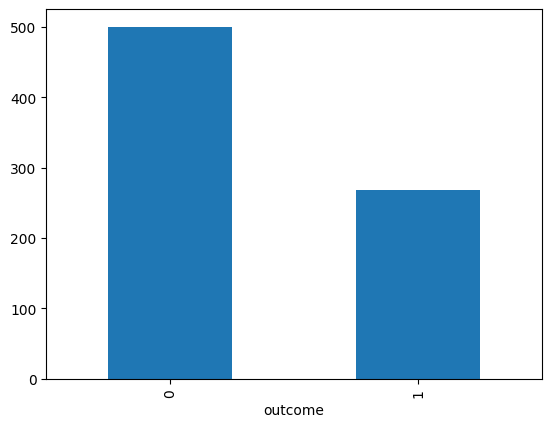

In [53]:
# Are the classes (outcome) balanced?
diabetes_df_clean["outcome"].value_counts().plot.bar();